## 1. Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime

In [2]:
df = pd.read_csv('Real estate valuation data set.csv')

## 2. Understanding the data types

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Some basic analysis of the data. Total count is only 414 data points which is considered quite few
The average (mean) age of the houses in that area is 17 years. With the youngest house being 0 years (brand new development) and the oldest being 43 years old. - It means that this is likely quite a new estate
We will probably drop X5 and X6 for now as this only gives us the location of each of the house. This can process more if we go into geospatial analysis.
1) Convert Dates into Year/Month
2) Keep X2,X3,X4
3) Drop X5 and X6 during Machine Learning portion unless we can find significant correlation whilst doing geospatial analysis
4) Convert House Price per unit area into full price amount

In [7]:
df['X1 transaction date']=df['X1 transaction date'].apply(math.modf)

In [8]:
df['month']=df['X1 transaction date'].apply(lambda x: math.ceil(x[0]*12) if math.modf(x[0]*12)[0]>0.5 else math.floor(x[0]*12))

In [9]:
# map to months
df['month'] = df['month'].map({0:'12',
                               1:'01',
                              2:'02',
                              3:'03',
                              4:'04',
                              5:'05',
                              6:'06',
                              7:'08',
                              8:'08',
                              9:'09',
                              10:'10',
                              11:'11'})

In [10]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,month
0,1,"(0.9169999999999163, 2012.0)",32.0,84.87882,10,24.98298,121.54024,37.9,11
1,2,"(0.9169999999999163, 2012.0)",19.5,306.59470,9,24.98034,121.53951,42.2,11
2,3,"(0.5830000000000837, 2013.0)",13.3,561.98450,5,24.98746,121.54391,47.3,08
3,4,"(0.5, 2013.0)",13.3,561.98450,5,24.98746,121.54391,54.8,06
4,5,"(0.8330000000000837, 2012.0)",5.0,390.56840,5,24.97937,121.54245,43.1,10
...,...,...,...,...,...,...,...,...,...
409,410,"(0.0, 2013.0)",13.7,4082.01500,0,24.94155,121.50381,15.4,12
410,411,"(0.6669999999999163, 2012.0)",5.6,90.45606,9,24.97433,121.54310,50.0,08
411,412,"(0.25, 2013.0)",18.8,390.96960,7,24.97923,121.53986,40.6,03
412,413,"(0.0, 2013.0)",8.1,104.81010,5,24.96674,121.54067,52.5,12


In [11]:
df['X1 transaction date']=df['month']+'-'+df['X1 transaction date'].apply(lambda x:str(int(x[1])))

In [12]:
# df['X1 transaction date']=df['X1 transaction date'].apply(lambda x:datetime.strptime(x,'%m-%Y'))

In [13]:
df = df.drop(columns=['No','month'])

In [14]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,11-2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,11-2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,08-2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,06-2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,10-2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,12-2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,08-2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,03-2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,12-2013,8.1,104.81010,5,24.96674,121.54067,52.5


## 3. EDA

C:\Users\Samuel\AppData\Local\Temp\ipykernel_27892\1004379736.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\Samuel\AppData\Local\Temp\ipykernel_27892\1004379736.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


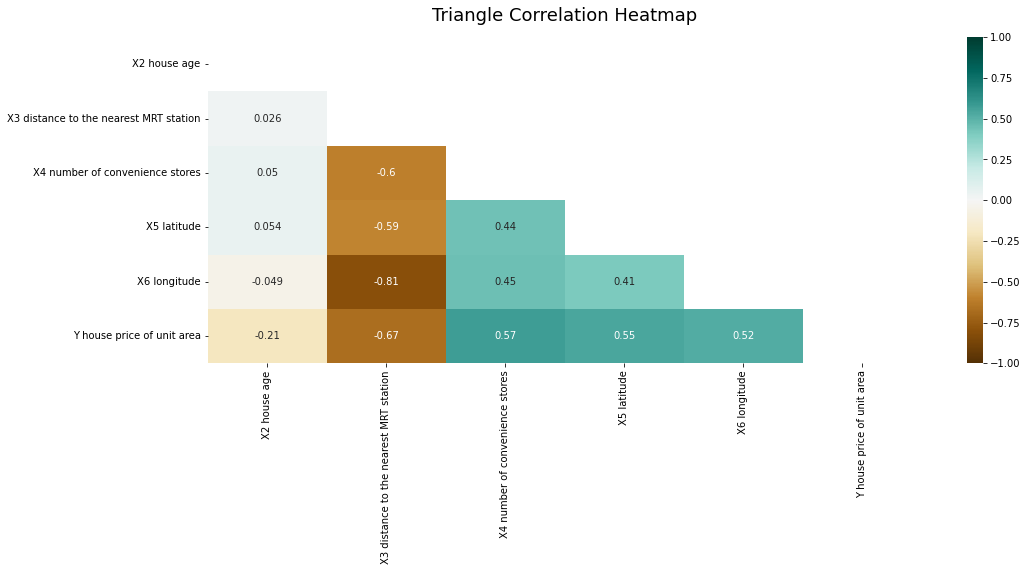

In [15]:
# Run correlation matrix
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- From the correlation graph, we can see that distnace to mrt has quite a large negative correlation to the housing prices
- Number of convenience stores also have a positive correlation with the housing prices

<Figure size 720x720 with 0 Axes>

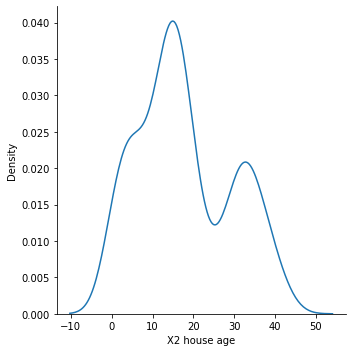

<Figure size 720x720 with 0 Axes>

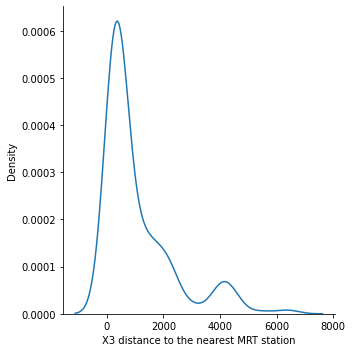

<Figure size 720x720 with 0 Axes>

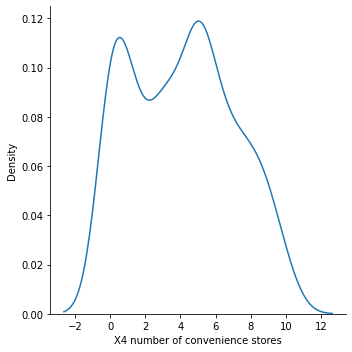

<Figure size 720x720 with 0 Axes>

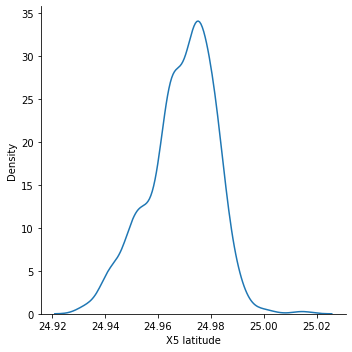

<Figure size 720x720 with 0 Axes>

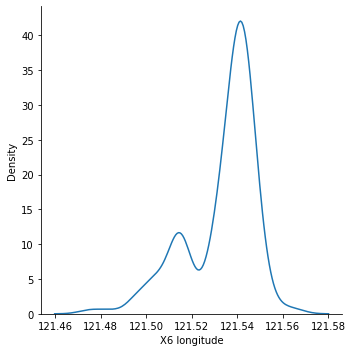

<Figure size 720x720 with 0 Axes>

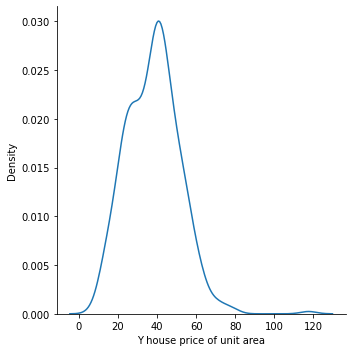

In [ ]:
# Understanding the data

for column in df.columns.to_list():
    if column == 'X1 transaction date':
        pass
    else:
        plt.figure(figsize=(10,10))
        sns.displot(data=df[column], kind='kde')

Density graphs have shown
- Highest number of houses average 10-20 years
- Most houses tend to be 0-2000m away from the subway station
- Number of convenience stores around the houses have a huge spread
- Many houses tend to be in the areas Lat: 24.96-24.98, Long: 121.54-121.56, further analysis can be done on this cluster
- Most housing prices are from 0-80 (10000TWD/ping)

<AxesSubplot:xlabel='X1 transaction date', ylabel='count'>

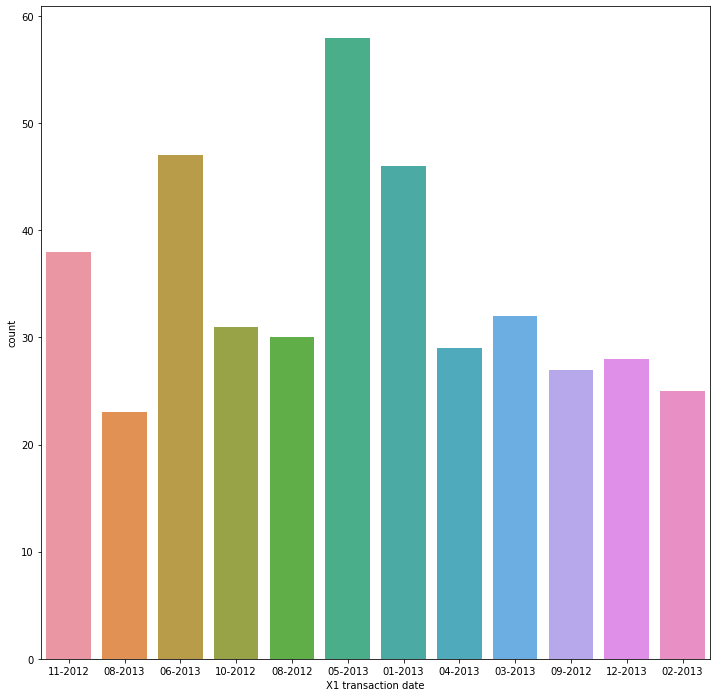

In [17]:
# Number of houses sold during time periods
plt.figure(figsize=(12,12))
sns.countplot(x='X1 transaction date', data=df)

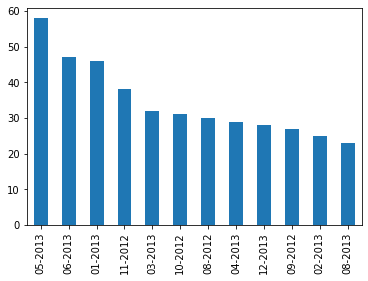

In [18]:
df['X1 transaction date'].value_counts().plot(kind="bar")

plt.show()

- Highest sales transacted in May 2013, and June 2013
- Most sales per month averaged around 30/mth

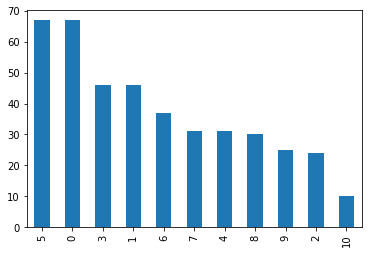

In [19]:
df['X4 number of convenience stores'].value_counts().plot(kind="bar")

plt.show()

- Approximately 1 in 6 houses does not have any convenience store in the living circle on foot. These houses are probably located in residential areas.
- Half of the houses has between 1 and 6 convenience stores in the living circle on foot.

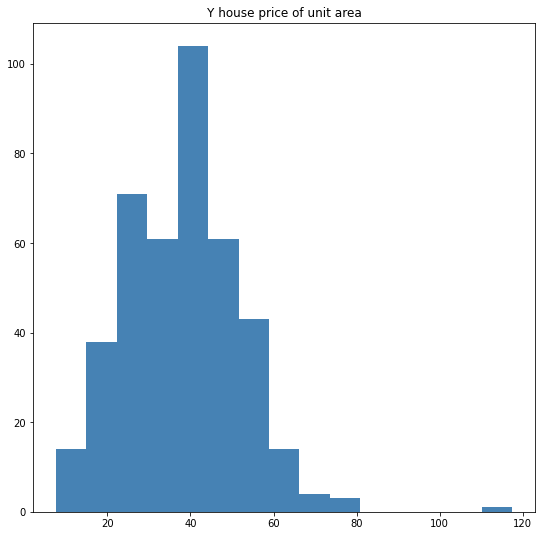

In [20]:
# visualise the distribution of Y house price of unit area
fig = df[[
          'Y house price of unit area'
          ]].hist(bins=15,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(9,9),
                 grid=False)

In [21]:
df['Y house price of unit area'].sort_values(ascending = False).head(10)

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
16      70.1
379     69.7
389     67.7
413     63.9
361     63.3
Name: Y house price of unit area, dtype: float64

We observe the following on the distribution of house prices of unit area:

- House price of unit are varies greatly from 76,000 New Taiwan Dollar/Ping to more than 1 million New Taiwan Dollar/Ping.
- More than half of house prices of unit area are between 250,000 and 500,000 New Taiwan Dollar/Ping.
- There are 8 houses for which the house price of unit area is more than 650,000 New Taiwan Dollar/Ping, with one being 1,115,000 New Taiwan Dollar/Ping (extreme value).

### Geospatial visualization

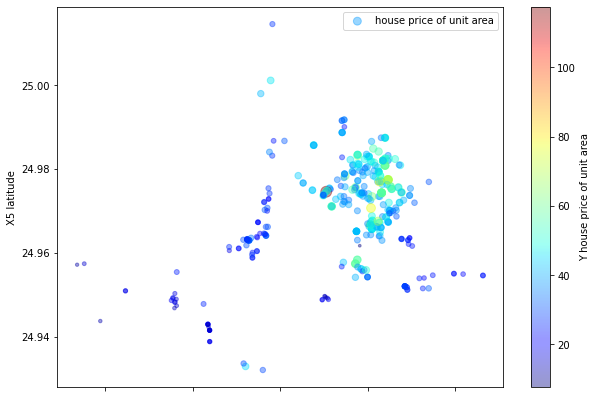

In [22]:
# visualise the geographical distribution of the house prices of unit area: X5 latitude and X6 longitude
df.plot(kind="scatter", x="X6 longitude", y="X5 latitude",
    s=df["Y house price of unit area"], label="house price of unit area",
    c='Y house price of unit area', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

House price of unit area are not evenly distributed in the Xindian district, with lowest values observed in the Western part, and highest values observed in the North eastern part.

### Outliers

As we saw from the housing prices (Y) above, there may be outliers in the dataset

So, to identify obvious outliers in our dataset. Based on the distribution of the Y house price of unit area, we will identify properties with very high prices that could be outliers.

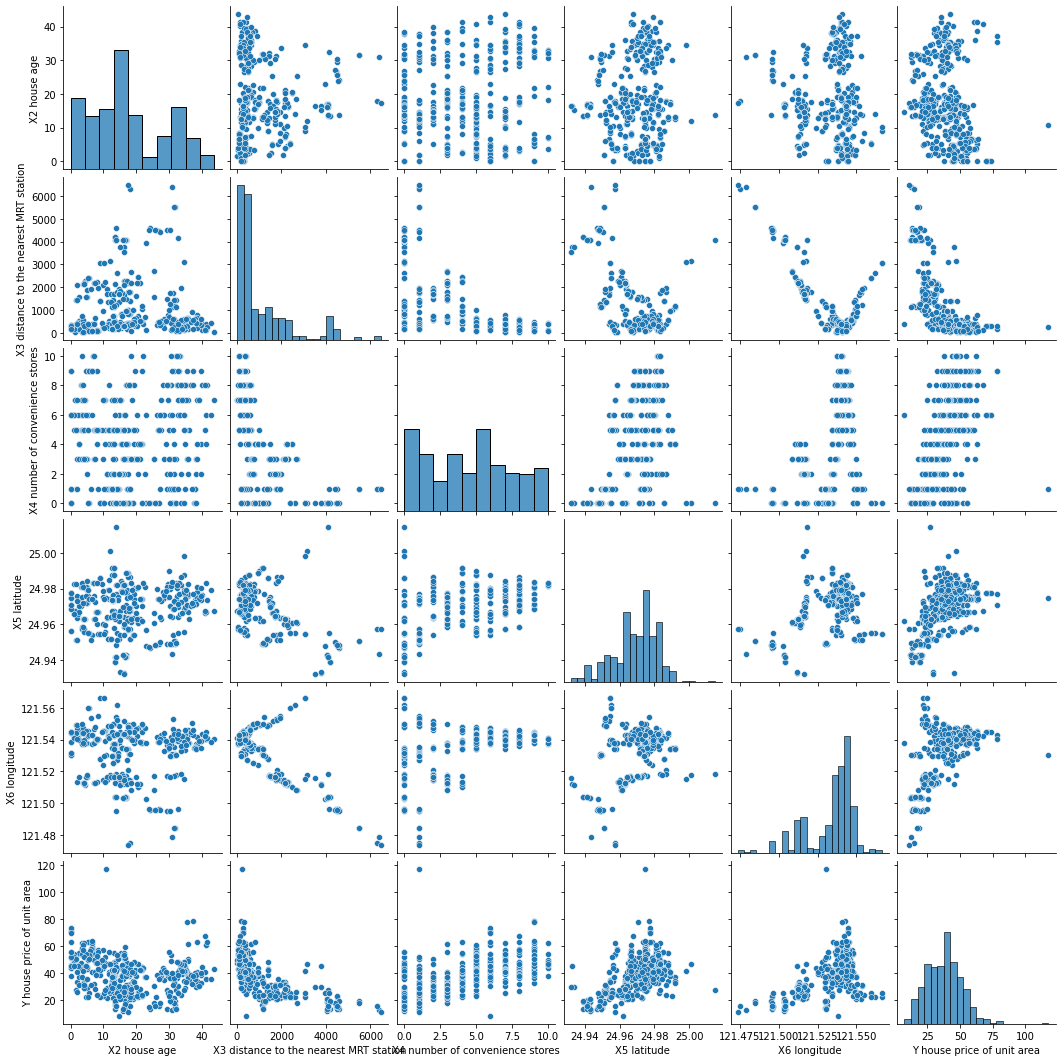

In [23]:
sns.pairplot(df)

There seems to be 1 outlier just as the Y has shown, we may consider dropping that in our Machine Learning Model later

In [24]:
# Dropping the outlier
df[df['Y house price of unit area']==117.5]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,04-2013,10.8,252.5822,1,24.9746,121.53046,117.5


In [25]:
df.drop(df.index[270],inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
# saving csv as for machine learning
df.to_csv('cleaned.csv')